<a href="https://colab.research.google.com/github/jenila19/vsd_workshop/blob/main/work_1_U_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np

In [ ]:
X_train_path = '/content/drive/MyDrive/macro_rudy_pin_congestion/X_train'
X_test_path = '/content/drive/MyDrive/macro_rudy_pin_congestion/X_test'
y_train_path = '/content/drive/MyDrive/macro_rudy_pin_congestion/y_train'
y_test_path = '/content/drive/MyDrive/macro_rudy_pin_congestion/y_test'

In [ ]:
X_train = [np.load(os.path.join(X_train_path, file))
  for file in os.listdir(X_train_path)
    if file.endswith('.npy')] # Load data from files into numpy arrays
X_test = [np.load(os.path.join(X_test_path, file))
  for file in os.listdir(X_test_path)
    if file.endswith('.npy')] # Load data from files into numpy arrays
y_train = [np.load(os.path.join(y_train_path, file))
  for file in os.listdir(y_train_path)
    if file.endswith('.npy')] # Load data from files into numpy arrays
y_test = [np.load(os.path.join(y_test_path, file))
  for file in os.listdir(y_test_path)
    if file.endswith('.npy')] # Load data from files into numpy arrays

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
#converting X and y into numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
#convert to pytorch tensor
X_train = torch.from_numpy(X_train).float()
X_test = torch.from_numpy(X_test).float()
y_train = torch.from_numpy(y_train).float()
y_test = torch.from_numpy(y_test).float()

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([371, 256, 256, 3]),
 torch.Size([371, 256, 256, 1]),
 torch.Size([159, 256, 256, 3]),
 torch.Size([159, 256, 256, 1]))

In [ ]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [ ]:
class unet(nn.Module):
  def __init__(self):
    super(unet, self).__init__()

    #encoder
    self.e11 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
    self.e12 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
    self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.e21 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
    self.e22 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
    self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.e31 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
    self.e32 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
    self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.e41 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
    self.e42 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
    self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

    self.e51 = nn.Conv2d(512, 1024, kernel_size=3, padding=1)
    self.e52 = nn.Conv2d(1024, 1024, kernel_size=3, padding=1)

    #decoder
    self.upconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
    self.d11 = nn.Conv2d(1024, 512, kernel_size=3, padding=1)
    self.d12 = nn.Conv2d(512, 512, kernel_size=3, padding=1)

    self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
    self.d21 = nn.Conv2d(512, 256, kernel_size=3, padding=1)
    self.d22 = nn.Conv2d(256, 256, kernel_size=3, padding=1)

    self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
    self.d31 = nn.Conv2d(256, 128, kernel_size=3, padding=1)
    self.d32 = nn.Conv2d(128, 128, kernel_size=3, padding=1)

    self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
    self.d41 = nn.Conv2d(128, 64, kernel_size=3, padding=1)
    self.d42 = nn.Conv2d(64, 64, kernel_size=3, padding=1)

    #output layer
    self.outconv = nn.Conv2d(64, 1, kernel_size=1)

  def forward(self, x):
    #encoder
    xe11 = F.relu(self.e11(x))
    xe12 = F.relu(self.e12(xe11))
    xpool1 = self.pool1(xe12)

    xe21 = F.relu(self.e21(xpool1))
    xe22 = F.relu(self.e22(xe21))
    xpool2 = self.pool2(xe22)

    xe31 = F.relu(self.e31(xpool2))
    xe32 = F.relu(self.e32(xe31))
    xpool3 = self.pool3(xe32)

    xe41 = F.relu(self.e41(xpool3))
    xe42 = F.relu(self.e42(xe41))
    xpool4 = self.pool4(xe42)

    xe51 = F.relu(self.e51(xpool4))
    xe52 = F.relu(self.e52(xe51))

    #decoder
    xu1 = self.upconv1(xe52)
    xu11 = torch.cat((xu1, xe42), dim=1) #skip-connection
    xd11 = F.relu(self.d11(xu11))
    xd12 = F.relu(self.d12(xd11))

    xu2 = self.upconv2(xd12)
    xu22 = torch.cat((xu2, xe32), dim=1)
    xd21 = F.relu(self.d21(xu22))
    xd22 = F.relu(self.d22(xd21))

    xu3 = self.upconv3(xd22)
    xu33 = torch.cat((xu3, xe22), dim=1)
    xd31 = F.relu(self.d31(xu33))
    xd32 = F.relu(self.d32(xd31))

    xu4 = self.upconv4(xd32)
    xu44 = torch.cat((xu4, xe12), dim=1)
    xd41 = F.relu(self.d41(xu44))
    xd42 = F.relu(self.d42(xd41))

    #output layer
    out = self.outconv(xd42)

    return out

In [ ]:
class doubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(doubleConv, self).__init__()
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.PReLU(num_parameters=out_channels), #nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.PReLU(num_parameters=out_channels)
        )

    def forward(self, x):
        return self.double_conv(x)

In [ ]:
class unet(nn.Module):
    def __init__(self):
        super(unet, self).__init__()

        # Encoder
        self.enc1 = doubleConv(3, 64)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.enc2 = doubleConv(64, 128)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.enc3 = doubleConv(128, 256)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.enc4 = doubleConv(256, 512)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.enc5 = doubleConv(512, 1024)

        # Decoder
        self.upconv1 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec1 = doubleConv(1024, 512)

        self.upconv2 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec2 = doubleConv(512, 256)

        self.upconv3 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec3 = doubleConv(256, 128)

        self.upconv4 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec4 = doubleConv(128, 64)

        # Output layer
        self.outconv = nn.Conv2d(64, 1, kernel_size=1)

    def forward(self, x):
        # Encoder
        x1 = self.enc1(x)
        p1 = self.pool1(x1)

        x2 = self.enc2(p1)
        p2 = self.pool2(x2)

        x3 = self.enc3(p2)
        p3 = self.pool3(x3)

        x4 = self.enc4(p3)
        p4 = self.pool4(x4)

        x5 = self.enc5(p4)

        # Decoder
        u1 = self.upconv1(x5)
        u11 = torch.cat((u1, x4), dim=1)  # Skip connection
        d1 = self.dec1(u11)

        u2 = self.upconv2(d1)
        u22 = torch.cat((u2, x3), dim=1)
        d2 = self.dec2(u22)

        u3 = self.upconv3(d2)
        u33 = torch.cat((u3, x2), dim=1)
        d3 = self.dec3(u33)

        u4 = self.upconv4(d3)
        u44 = torch.cat((u4, x1), dim=1)
        d4 = self.dec4(u44)

        # Output layer
        out = self.outconv(d4)

        return out

In [ ]:
#Initialize model, loss_fn, optimizer
model = unet()
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
#device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [ ]:
model.load_state_dict(torch.load('/content/drive/MyDrive/congestion/unet_model_epoch100.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
#Training loop
epochs = 1

for epoch in range(epochs):
  model.train()
  train_loss = 0.0

  for i, (features, labels) in enumerate(train_loader):
    features = features.permute(0, 3, 1, 2).to(device)
    labels = labels.permute(0,3,1,2).to(device)

    optimizer.zero_grad()

    #forward pass
    outputs = model(features)

    #calculate loss
    loss = loss_fn(outputs, labels)

    loss.backward()

    #update weights
    optimizer.step()

    train_loss += loss.item() * features.size(0)

  train_loss /= len(train_loader.dataset)
  print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}')

Epoch 1/1, Train Loss: 0.5850


In [ ]:
#to save the model
torch.save(model.state_dict(), '/content/drive/MyDrive/macro_rudy_pin_congestion/unet_model_epoch50.pth')

In [ ]:
#to save the model
torch.save(model.state_dict(), 'unet_model_epoch5_enc_renet34.pth')

In [ ]:
#validation
model.eval()
test_loss = 0.0

with torch.no_grad():
  for features, labels in test_loader:
    features = features.permute(0, 3, 1, 2).to(device)
    labels = labels.permute(0,3,1,2).to(device)

    outputs = model(features)
    loss = loss_fn(outputs, labels)

    test_loss += loss.item() * features.size(0)

test_loss /= len(test_loader.dataset)
print(f'Test Loss: {test_loss:.4f}')

Test Loss: 0.0844


In [ ]:
#loading test_loader
test_features, test_labels = next(iter(test_loader))
test_features, test_labels = test_features.permute(0, 3, 1, 2).to(device), test_labels.permute(0, 3, 1, 2).to(device)

In [ ]:
predicted_output = model(test_features)

In [ ]:
predicted_output = predicted_output.cpu().detach().numpy()
test_labels = test_labels.cpu().detach().numpy()

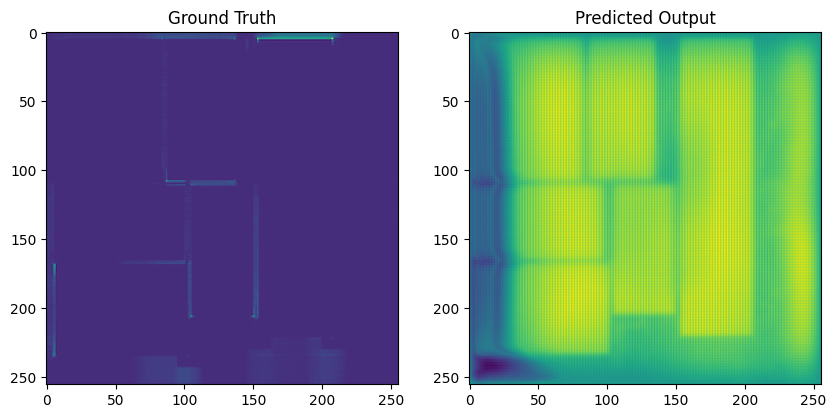

In [ ]:
#visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(test_labels[0,0,:,:])
plt.title('Ground Truth')

plt.subplot(1, 2, 2)
plt.imshow(predicted_output[0,0,:,:])
plt.title('Predicted Output')

plt.show()

In [ ]:
mse = np.mean((test_labels - predicted_output) ** 2)
print(f"MSE: {mse:.4f}")

MSE: 0.0048


In [ ]:
#PSNR
def psnr(test_labels, predicted_output):
  mse = np.mean((test_labels - predicted_output) ** 2)
  max_pixel = 1.0
  psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
  return psnr

psnr_value = psnr(test_labels, predicted_output)
print(f"PSNR: {psnr_value:.4f}")

PSNR: 23.1914


In [ ]:
#SSIM
from skimage.metrics import structural_similarity as ssim

ssim_value = ssim(test_labels[4,0,:,:], predicted_output[4,0,:,:], data_range=predicted_output.max() - predicted_output.min())
print(f"SSIM: {ssim_value:.4f}")

SSIM: nan


/usr/local/lib/python3.10/dist-packages/skimage/metrics/_structural_similarity.py:269: RuntimeWarning: divide by zero encountered in divide
  S = (A1 * A2) / D
/usr/local/lib/python3.10/dist-packages/skimage/metrics/_structural_similarity.py:269: RuntimeWarning: invalid value encountered in divide
  S = (A1 * A2) / D
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [ ]:
rmse = np.sqrt(np.mean((test_labels - predicted_output) ** 2))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.0693


In [ ]:
import numpy as np

def compute_nrmse(true_values, predicted_values, normalization='range'):
    # Compute RMSE
    rmse = np.sqrt(np.mean((predicted_values - true_values) ** 2))

    # Normalization based on the selected method
    if normalization == 'range':
        # Normalization by the range (max - min) of true values
        norm_factor = np.max(true_values) - np.min(true_values)
    elif normalization == 'std':
        # Normalization by the standard deviation of true values
        norm_factor = np.std(true_values)
    elif normalization == 'mean':
        # Normalization by the mean of true values
        norm_factor = np.mean(true_values)
    else:
        raise ValueError(f"Unknown normalization method: {normalization}")

    # Compute NRMSE
    nrmse = rmse / norm_factor

    return nrmse

# Example usage:
# true_values: ground truth labels (numpy array)
# predicted_values: model predictions (numpy array)

nrmse_range = compute_nrmse(true_values, predicted_values, normalization='range')
print(f"NRMSE (Range Normalization): {nrmse_range}")

nrmse_std = compute_nrmse(true_values, predicted_values, normalization='std')
print(f"NRMSE (Standard Deviation Normalization): {nrmse_std}")

nrmse_mean = compute_nrmse(true_values, predicted_values, normalization='mean')
print(f"NRMSE (Mean Normalization): {nrmse_mean}")
